# Qiskit Tutorialを触る
Ref. -> [Tutorial](https://qiskit.org/documentation/intro_tutorial1.html)
---

## install qiskit to Colaboratory

In [ ]:
# Ready to use Qiskit (for Google Colab)
!pip install qiskit pylatexenc

## import package

In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

## initialize variables

In [3]:
circuit = QuantumCircuit(2, 2)


## add gates

In [4]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

## visualize the circuit

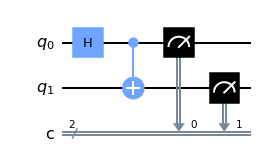

In [5]:
circuit.draw(output='mpl')